In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
# Reading in the csv files located on my computer and naming it movies.  Using movies.head() to make sure it looks right.

movies = pd.read_csv('C:/Users/robbu/Desktop/general_assembly/jupyter_files/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


Check the number of rows and columns.

In [4]:
# using movies.shape to show this data has 6 columns and 979 rows.

movies.shape

(979, 6)

Check the data type of each column.

In [5]:
# Using pd.Dataframe to put the data types of movies into a data fram and naming the column DataType/

pd.DataFrame(movies.dtypes, columns=['DataType'])

,DataType
star_rating,float64
title,object
content_rating,object
genre,object
duration,int64
actors_list,object


Calculate the average movie duration.

In [6]:
# Finding the average duration by using mean() on the duration column.  The average duration is 120.979571.

movies[['duration']].mean()

duration    120.979571
dtype: float64

Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
#sorting the durations highest to lowest and then looking at the highest value using head(1).   Hamlet is the longest at 242.

movies.sort_values(by='duration',ascending=False).head(1)  

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [8]:
#sorting the durations highest to lowest and then looking at the lowest value using tail(1).  Freaks is the shortest at 64

movies.sort_values(by='duration',ascending=False).tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


Create a histogram of duration, choosing an "appropriate" number of bins.

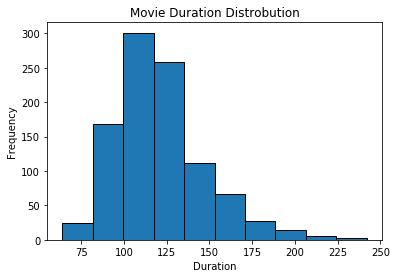

In [9]:
# Experimented with different bins and found that 10 seemed appropriate.  Then just adding some labels.

movies.duration.plot(kind='hist',bins=10,edgecolor='black');
plt.xlabel('Duration');
plt.ylabel('Frequency');
plt.title('Movie Duration Distrobution');

Use a box plot to display that same data.

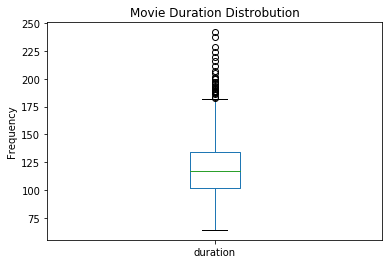

In [10]:
# Same thing as above except with kind = box
movies.duration.plot(kind='box');
plt.ylabel('Frequency');
plt.title('Movie Duration Distrobution');

Count how many movies have each of the content ratings.

In [13]:
# here i am taing the movies dataframe and just counting the value_counts with each didstinct rating.
# I use dropna=True here because I dont want to count the null values.  If you cared about the null values then you could use
# If you used drapna=False then it would show Nan with a count of 3.

movies['content_rating'].value_counts(dropna=True)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

Use a visualization to display that same data, including a title and x and y labels.

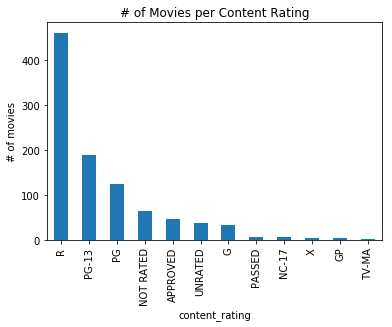

In [78]:
# I am putting the data of the value counts into its own variable just to make it cleaner.  

movies_bar = movies['content_rating'].value_counts(dropna=True)

# Now i am plotting a vertical bar chart for the new variabe.  This includes plotting an xaxis, yaxis, and title.
# Not sure why all my bars are blue.  asksed this question in class but didnt get an answer.  Regardless, It doesnt affect anything.
movies_bar.plot(kind='bar');
plt.ylabel('# of movies');
plt.xlabel('content_rating');
plt.title('# of Movies per Content Rating');

Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [14]:
# here i am replacing the values in the content_rating column with the specified data.  I use inplace=True so i dont have to
# reset the variable

movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

Convert the following content ratings to "NC-17": X, TV-MA.

In [15]:
# here i am replacing the values in the content_rating column with the specified data.  I use inplace=True so i dont have to
# reset the variable

movies.content_rating.replace(['X','TV-MA'], 'NC-17', inplace=True)

Count the number of missing values in each column.

In [85]:
# This code just sums the number of null values in each coumn

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

If there are missing values: examine them, then fill them in with "reasonable" values.

In [91]:
# we know that the only column with missing values is the content_rating column so i just look at that. i use the brackets
# so i can filter and look at just the nulls

movies[movies.content_rating.isnull()]

# after lookin at the data, there are 3 content_ratings we dont know the value of.  Since we don't know the rating we can 
# I am going to fill the nulls with 'UNRATED' because it doesnt have a rating,. Use inplace=True to set the variable again

movies.content_rating.fillna('UNRATED', inplace=True)

Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [101]:
#  the duration is in minutes (assuming) so i want to look at the mean for movies >=120 and movies <120
# looking at the star_rating value for movies 120 mins and over

movies[movies.duration >= 120].star_rating.mean()

7.948898678414082

In [102]:
# looking at the star_rating value for movies under 120 minutes

movies[movies.duration < 120].star_rating.mean()

7.838666666666657

Use a visualization to detect whether there is a relationship between duration and star rating.

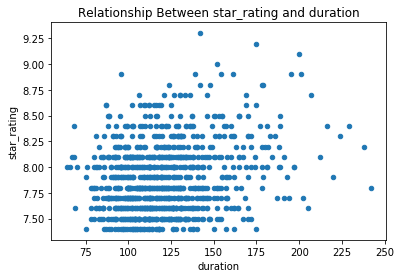

In [118]:
# using a scatter plot because it is a good visual to look at the relationship between two variables.

movies.plot(kind='scatter', x = 'duration', y='star_rating', title = 'Relationship Between star_rating and duration');

Calculate the average duration for each genre.

In [119]:
# I am grouping by genre and calculating the mean based on the duration.

movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64